In [30]:
#Essential Constants
from scipy.constants import h, c, hbar, u, k

#Imports from other script/s
from ipynb.fs.full.Conversions_Epimetheus import * #Conversion Doc
from ipynb.fs.full.Atomic_Mass_Key import element #Mass Key File
from ipynb.fs.full.EpiPan_Functions import * #All Functions

#General Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import itertools
import pandas as pd

In [31]:
#Import Desired PES
from ipynb.fs.full.O3_PES_fortran_DAWES import PES

### Manual Inputs

In [32]:
#Temperature
T = 300

In [33]:
molecule = ["O", "O-18", "O-18"]

In [34]:
#Positions/Bond Lengths/Angles
r1 = 1.28
r2 = r1
alpha = 116.78 
#Fortran values
r1 =1.27200
r2 = r1
alpha =116.7800
coord = coord_triatomic(alpha, r1, r2)

In [35]:
mass = ((element[molecule[0]] * u * kg_to_me), 
            (element[molecule[1]] * u * kg_to_me), 
            (element[molecule[2]] * u * kg_to_me))

In [36]:
B, I, COMcoord = rot_inertia_rcom(coord, mass)

R_com [0.04175849 0.43589942 0.        ]
r_COMalpha [[-1.12503881  0.23079973  0.        ]
 [-0.04175849 -0.43589942  0.        ]
 [ 1.04152182  0.23079973  0.        ]]


### Calculations 

In [37]:
Key, Pos =  Key_and_Pos(coord)

In [38]:
PES_func = PES(Key, Pos, molecule)

In [39]:
Hess = Hess_CART(Key, Pos, PES, molecule)

In [40]:
Hess_MWC_fin = Hess_MWC(Hess, Key, mass)

In [41]:
eigvals, eigvecs, Hess_diag_au, Hess_diag_wn, fundamentals_au, fundamentals_wn = eigval_eigvec(Hess_MWC_fin)

In [42]:
eigvecs_UMW = UMW(eigvecs, mass, Key)

In [43]:
displace_vec, displace_val= displace_vec_and_val(eigvals, eigvecs_UMW)

In [44]:
cubic = cubic_CART(Key, Pos, displace_vec, displace_val, PES, molecule)

In [45]:
quartic = quartic_CART(Key, Pos, displace_vec, displace_val, PES, molecule)

In [46]:
sigma = sigma_ij(displace_val, cubic)

In [47]:
deltaETOSH = deltaETOSH_ij(displace_val, cubic, quartic, sigma)

In [48]:
allrot = all_rot_const(displace_vec, sigma, coord, mass, bohr_to_angstrom)

R_com [4.17582597e-02 4.35903733e-01 4.65405047e-19]
r_COMalpha [[-1.12283770e+00  2.35577786e-01  9.48254707e-19]
 [-4.66966228e-02 -4.47427407e-01 -3.77597838e-19]
 [ 1.04450394e+00  2.38081712e-01 -4.65066676e-19]]
R_com [4.17583411e-02 4.35900723e-01 1.49980587e-19]
r_COMalpha [[-1.12222768e+00  2.31117263e-01  3.09904166e-19]
 [-4.52277546e-02 -4.38596495e-01 -1.25536348e-19]
 [ 1.04249298e+00  2.33214634e-01 -1.49859325e-19]]
R_com [ 4.17586988e-02  4.35896009e-01 -3.75792819e-19]
r_COMalpha [[-1.12744457e+00  2.27174323e-01 -7.68155434e-19]
 [-3.82571307e-02 -4.27303296e-01  3.07098674e-19]
 [ 1.04015833e+00  2.25425321e-01  3.75521007e-19]]


In [49]:
key_data = data_file_maker_triatomic(displace_val, deltaETOSH, B, allrot, "O3_688_13DaLo_specconst")

   harmonic_wn  anharmonic_wn     B_000   B_Freq1   B_Freq2   B_Freq3
0  1080.859395    1055.020224  3.227242  3.065050  3.189197  3.357065
1  1034.852786     993.058300  0.423468  0.422993  0.424070  0.423167
2   684.297572     668.393932  0.374347  0.371697  0.374299  0.375797


In [50]:
J_max_arr, A_rot, B_rot, C_rot = J_max_func(B, T)

In [51]:
P_nu1, P_rot_nu1, P_index_nu1 = asytop_v_P(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])

Q_nu1, Q_rot_nu1, Q_index_nu1 = asytop_v_Q(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])

R_nu1, R_rot_nu1, R_index_nu1 = asytop_v_R(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])
##

100%|██████████| 76/76 [00:11<00:00,  6.86it/s] 


In [52]:
P_nu2, P_rot_nu2, P_index_nu2 = asytop_v_P(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])

Q_nu2, Q_rot_nu2, Q_index_nu2 = asytop_v_Q(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])

R_nu2, R_rot_nu2, R_index_nu2 = asytop_v_R(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])
##

100%|██████████| 76/76 [00:13<00:00,  5.81it/s] 


In [53]:
P_nu3, P_rot_nu3, P_index_nu3 = asytop_v_P(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])

Q_nu3, Q_rot_nu3, Q_index_nu3 = asytop_v_Q(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])

R_nu3, R_rot_nu3, R_index_nu3 = asytop_v_R(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])
##

100%|██████████| 76/76 [00:11<00:00,  6.83it/s] 


In [54]:
nu1_I = Norm_I(P_rot_nu1, P_index_nu1, Q_rot_nu1, Q_index_nu1, R_rot_nu1, R_index_nu1, T, 1, 0.039)
##

In [55]:
nu2_I = Norm_I(P_rot_nu2, P_index_nu2, Q_rot_nu2, Q_index_nu2, R_rot_nu2, R_index_nu2, T, 1, 0.047)
##

In [56]:
nu3_I = Norm_I(P_rot_nu3, P_index_nu3, Q_rot_nu3, Q_index_nu3, R_rot_nu3, R_index_nu3, T, 1, 1)
##

In [57]:
Final_I = Fin_I(nu1_I[0], nu1_I[1],nu1_I[2], nu2_I[0], nu2_I[1], nu2_I[2], nu3_I[0], nu3_I[1], nu3_I[2])
##

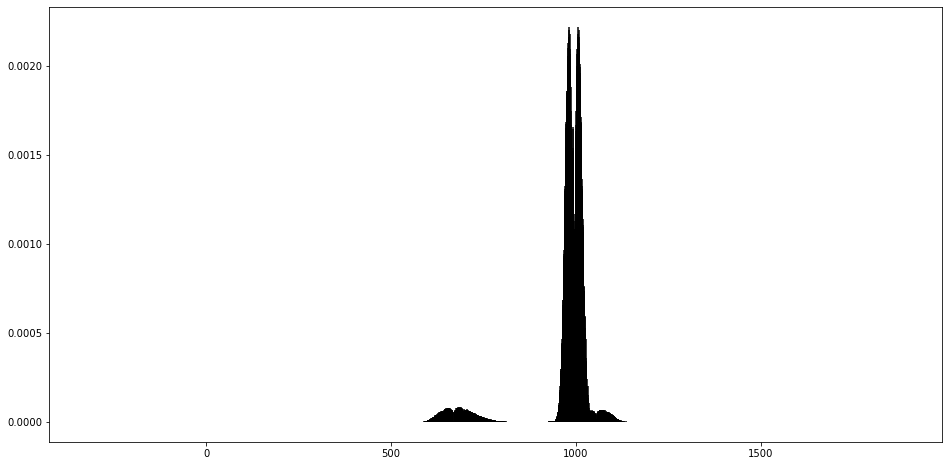

In [58]:
Pos = np.concatenate((P_nu1, Q_nu1, R_nu1, P_nu2, Q_nu2, R_nu2, P_nu3, Q_nu3, R_nu3))
Pos = np.reshape(Pos, (len(Pos),1))
Int = np.concatenate((Final_I[0], Final_I[1], Final_I[2], Final_I[3], Final_I[4], Final_I[5], Final_I[6], Final_I[7], Final_I[8]))
Int = np.reshape(Int, (len(Int),1))
Pos_and_Int = np.concatenate((Pos,Int), axis=1)
np.savetxt("O3_688_13DaLo_outputdata_WN_and_INT.txt", Pos_and_Int, delimiter=",")
#Quick double check of the data saved
plt.figure(figsize=(16,8))
plt.vlines(Pos_and_Int[:,0],0,Pos_and_Int[:,1])